In [19]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import pandas as pd
import os
os.sys.path.extend(['../evaluation'])
from evaluate import model_preprocessed_filepath
import glob
from matplotlib import pyplot as plt
import math
%matplotlib inline

chencherry = SmoothingFunction().method2

In [20]:
def get_scores(filepath, subset='all-cat'):
    
    references_files = [f'../evaluation/references/{subset}_reference{i}.lex' for i in range(3)]
    hypothesis_file = filepath

    scores = []
    hypothesis = []
    references = []

    with open(references_files[0], 'r', encoding='utf-8') as ref0,\
         open(references_files[1], 'r', encoding='utf-8') as ref1,\
         open(references_files[2], 'r', encoding='utf-8') as ref2,\
         open(hypothesis_file, 'r', encoding='utf-8') as hyp:


        for h, r0, r1, r2 in zip(hyp, ref0, ref1, ref2):

            references.append((r0[:-1], r1[:-1], r2[:-1]))
            hypothesis.append(h[:-1])

    for hyp, refs in zip(hypothesis, references):

        score = sentence_bleu([r.split() for r in refs], 
                              hyp.split(), 
                              smoothing_function=chencherry)

        scores.append(score)
        
    return scores, hypothesis, references
    

def plot_hist_bleu(filepath, ax, subset='all-cat'):

    scores, _, _ = get_scores(filepath, subset)
    
    s = pd.Series(scores)
    
    s.hist(ax=ax, bins=40)

In [21]:
def plot_all_models_hist_bleu(subset):
    
    models = [os.path.basename(s) for s in glob.glob('../data/models/*')]

    n_models = len(models)
    n_columns = 3
    n_rows = math.ceil(n_models / 3)

    fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 5*n_rows), sharey=True, sharex=True)

    for model, ax in zip(models, axes.ravel()):

        filepath = model_preprocessed_filepath(model, subset)

        plot_hist_bleu(filepath, ax, subset)
        ax.set_title(model)

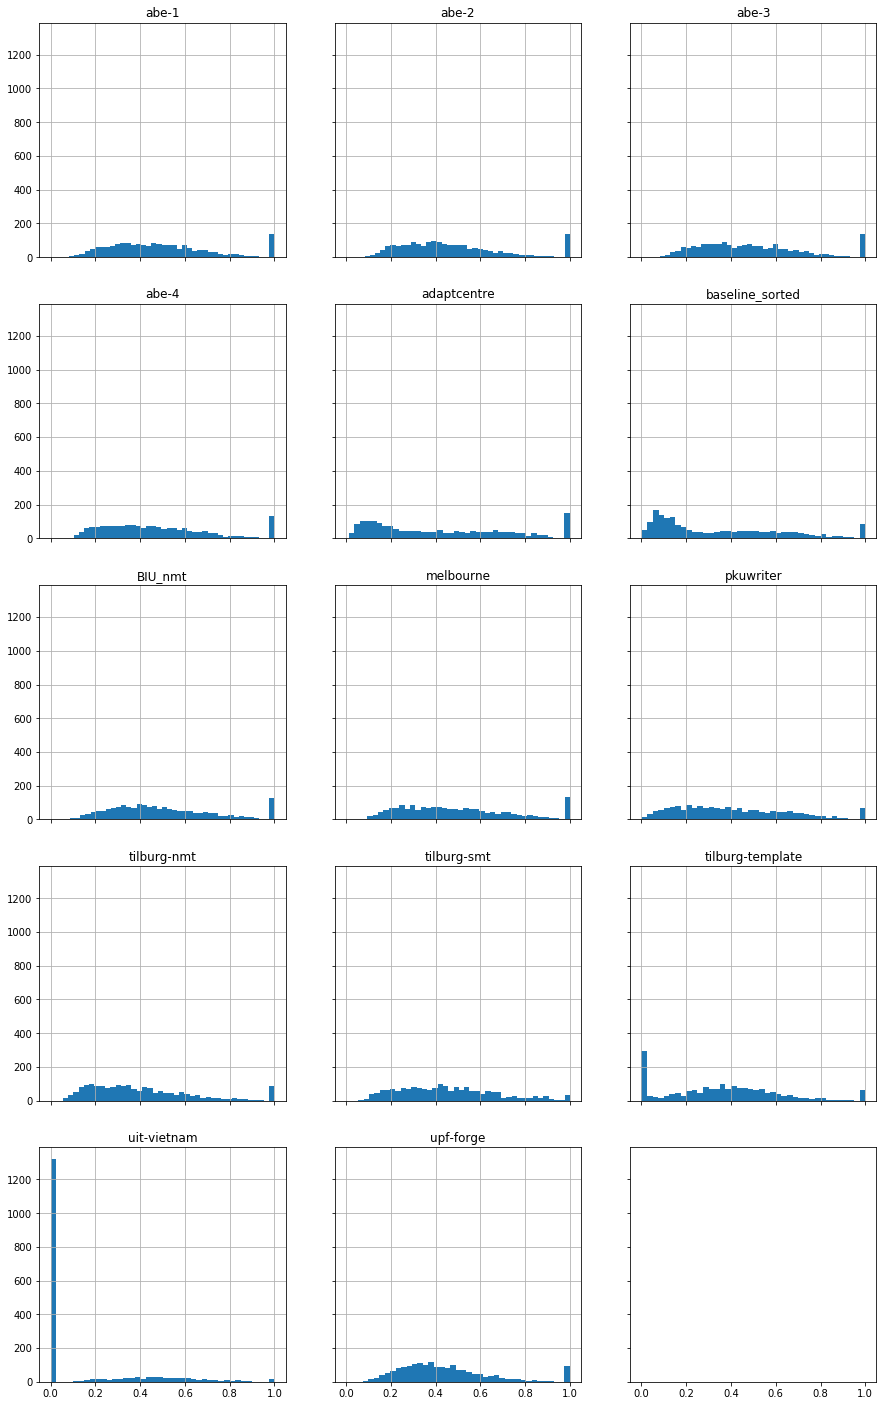

In [84]:
plot_all_models_hist_bleu('all-cat')

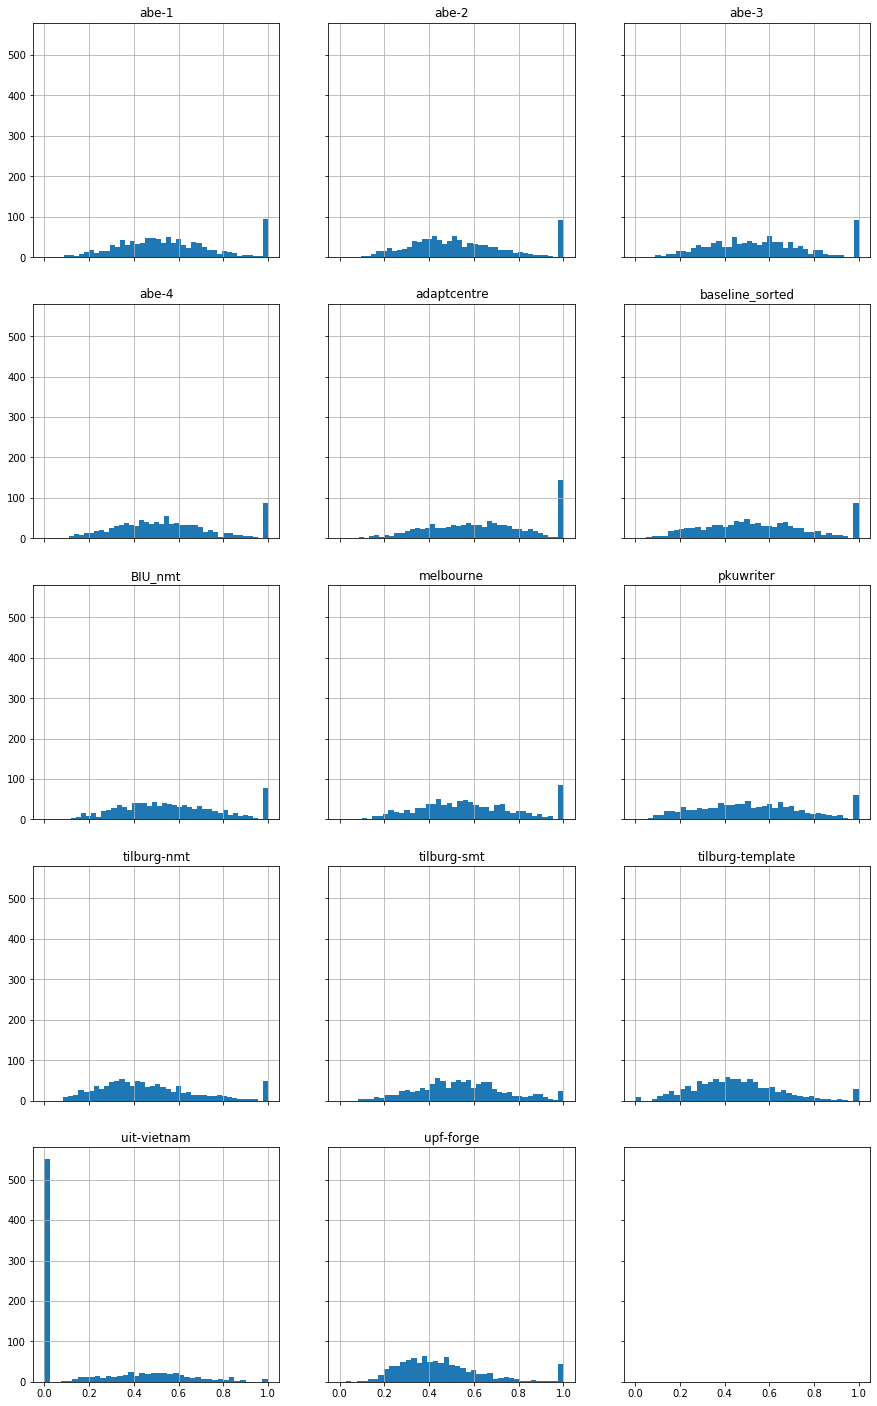

In [85]:
plot_all_models_hist_bleu('old-cat')

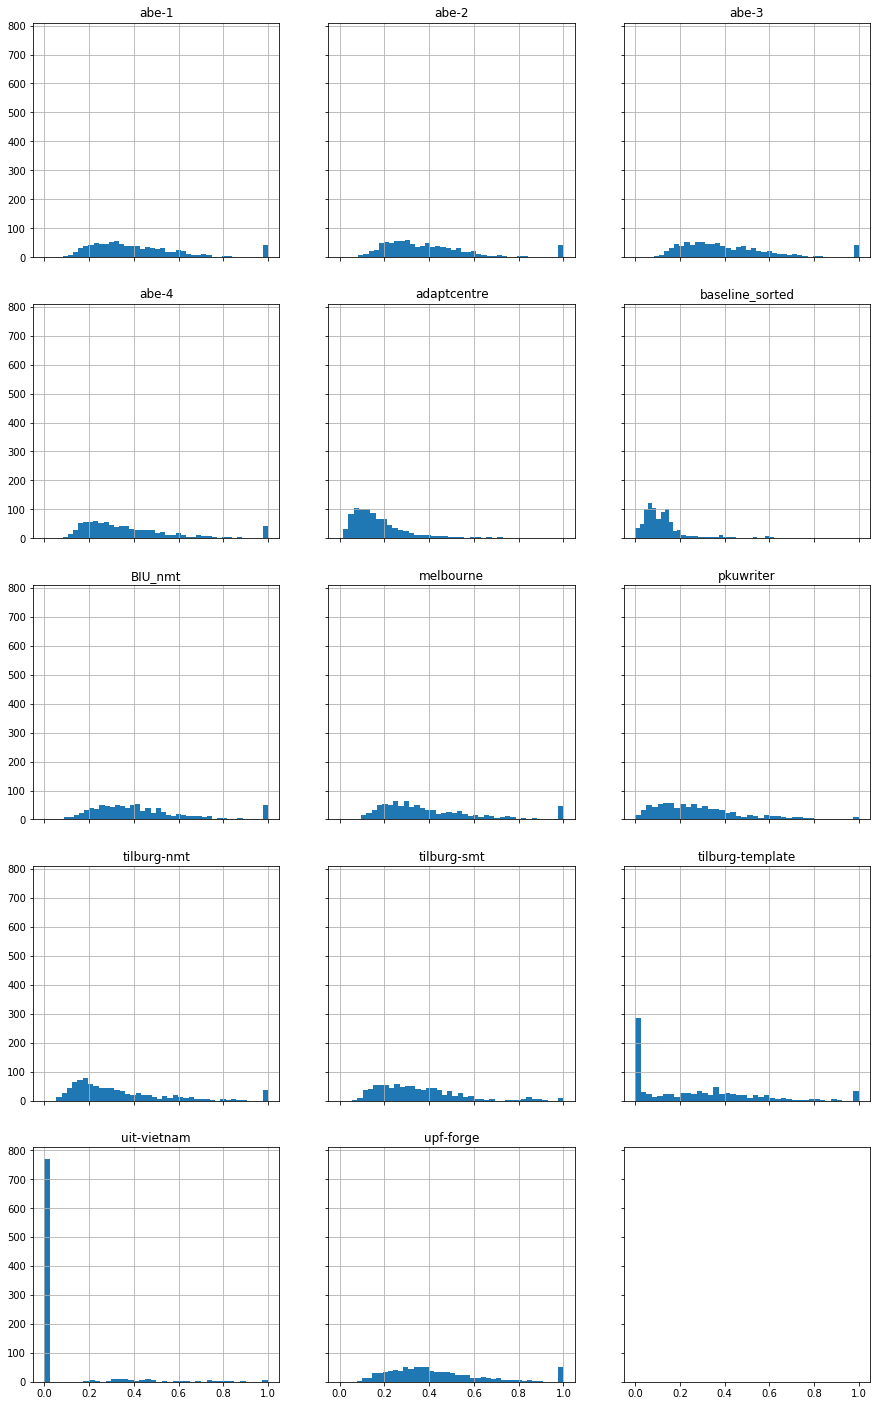

In [86]:
plot_all_models_hist_bleu('new-cat')

# Menores scores

In [22]:
scores, hypothesis, references = get_scores(model_preprocessed_filepath('adaptcentre', 'old-cat'), 'old-cat')
sorted_scores = sorted([(i, s) for i, s in enumerate(scores)], key=lambda v: v[1])

scores_a, hypothesis_a, references = get_scores(model_preprocessed_filepath('abe', 'old-cat'), 'old-cat')
sorted_scores_a = sorted([(i, s) for i, s in enumerate(scores_a)], key=lambda v: v[1])

In [23]:
import pandas as pd

pd.set_option('display.max_colwidth', 1000)

df = pd.DataFrame({'adaptcentre': scores, 'abe': scores_a, 'adaptcentre_texts': hypothesis, 'abe_texts': hypothesis_a})

df.head()

,abe,abe_texts,adaptcentre,adaptcentre_texts
0,0.723548,abilene regional airport serves the city of abilene .,0.854574,"abilene regional airport serves the city of abilene , texas ."
1,1.000000,"adolfo suarez madrid - barajas airport is located in madrid , paracuellos de jarama , san sebastian de los reyes and alcobendas .",1.000000,"adolfo suarez madrid - barajas airport can be found in madrid , paracuellos de jarama , san sebastian de los reyes and alcobendas ."
2,0.770065,18l / 36r is the runway name of adolfo suarez madrid - barajas airport .,1.000000,the runway name of adolfo suarez madrid - barajas airport is 18l / 36r .
3,0.851216,the icao location identifier of afonso pena international airport is sbct .,0.475873,afonso pena international airport ' s icao location identifier is sbct .
4,1.000000,afonso pena international airport serves the city of curitiba .,1.000000,afonso pena international airport serves the city of curitiba .


In [39]:
df[df.adaptcentre == 1].tail(40).head(10)

,abe,abe_texts,adaptcentre,adaptcentre_texts,winner,dif
189,0.649635,chili pepper is an ingredient in arrabbiata sauce .,1.0,an important ingredient in arrabbiata sauce is chili pepper .,adaptcentre,-0.350365
190,1.000000,white rice is an ingredient in arros negre .,1.0,white rice is an ingredient in arros negre .,adaptcentre,0.000000
192,0.303312,arros negre is from the the valencian community region .,1.0,arros negre comes from the region of the valencian community .,adaptcentre,-0.696688
193,1.000000,ayam penyet is from the singapore region .,1.0,ayam penyet is from the singapore region .,adaptcentre,0.000000
196,0.575035,bakewell pudding served warm or cold .,1.0,bakewell pudding can be served either warm or cold .,adaptcentre,-0.424965
197,0.691442,bandeja paisa is from colombian cuisine .,1.0,bandeja paisa is typical colombian cuisine .,adaptcentre,-0.308558
199,0.549851,bandeja paisa is from the the paisa region region .,1.0,bandeja paisa is from the paisa region .,adaptcentre,-0.450149
201,0.550137,batagor is a variation of the dish shumai .,1.0,batagor and shumai are variations on the same dish .,adaptcentre,-0.449863
203,1.000000,shrimp is an ingredient in batchoy .,1.0,shrimp is an ingredient in batchoy .,adaptcentre,0.000000
205,0.449733,the alternative name for bhajji is bhaji or bajji .,1.0,bhaji and bajji are alternative names for bhajji .,adaptcentre,-0.550267


In [25]:
df['winner'] = (df['abe'] > df.adaptcentre).map({True: 'abe', False: 'adaptcentre'})
df['dif'] = df['abe'] - df.adaptcentre
df.head()

,abe,abe_texts,adaptcentre,adaptcentre_texts,winner,dif
0,0.723548,abilene regional airport serves the city of abilene .,0.854574,"abilene regional airport serves the city of abilene , texas .",adaptcentre,-0.131026
1,1.000000,"adolfo suarez madrid - barajas airport is located in madrid , paracuellos de jarama , san sebastian de los reyes and alcobendas .",1.000000,"adolfo suarez madrid - barajas airport can be found in madrid , paracuellos de jarama , san sebastian de los reyes and alcobendas .",adaptcentre,0.000000
2,0.770065,18l / 36r is the runway name of adolfo suarez madrid - barajas airport .,1.000000,the runway name of adolfo suarez madrid - barajas airport is 18l / 36r .,adaptcentre,-0.229935
3,0.851216,the icao location identifier of afonso pena international airport is sbct .,0.475873,afonso pena international airport ' s icao location identifier is sbct .,abe,0.375343
4,1.000000,afonso pena international airport serves the city of curitiba .,1.000000,afonso pena international airport serves the city of curitiba .,adaptcentre,0.000000


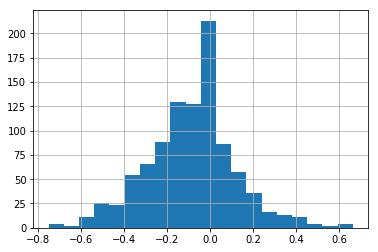

In [26]:
df.dif.hist(bins=20)

In [27]:
df.nsmallest(10, 'dif')

,abe,abe_texts,adaptcentre,adaptcentre_texts,winner,dif
866,0.154138,fried chicken is one of the ingredients in ayam penyet which is from the nationwide and also in malaysia and singapore region and java where the javenese people are one of the ethnic groups .,0.906187,"the fried chicken dish ayam penyet is made nationwide in java ( home of the javanese ) , and can also be found in malaysia and singapore .",adaptcentre,-0.752049
207,0.278515,bionico is a variation of cottage cheese .,1.000000,bionico can be varied by using cottage cheese .,adaptcentre,-0.721485
429,0.294805,washington dc is the capital of the united states a country where one of the ethnic groups is native americans . also where a severed wasp originates from .,1.000000,a severed wasp is from the united states where the capital is washington dc and the native americans are an ethnic group .,adaptcentre,-0.705195
192,0.303312,arros negre is from the the valencian community region .,1.000000,arros negre comes from the region of the valencian community .,adaptcentre,-0.696688
251,0.358313,arrabbiata sauce originates from the country of italy where italian is spoken .,1.000000,arrabbiata sauce is from italy where the italian language is spoken .,adaptcentre,-0.641687
380,0.229054,3arena is located in east link bridge and was designed by hok sve .,0.839433,"hok sve was the architect of the 3arena , which is located at east link bridge .",adaptcentre,-0.610378
107,0.396111,aek athens fc played in the 2014 - 2015 season .,1.000000,aek athens fc played the 2014 - 2015 season in the football league ( greece ) .,adaptcentre,-0.603889
871,0.248906,"alan bean , a the united states national whose birth place is wheeler , texas , served as a test pilot . he was selected to work for nasa in 1963 and has since retired .",0.845685,"alan bean is a us national who was born in wheeler , texas . he was a test pilot and was selected by nasa in 1963 . he is now retired .",adaptcentre,-0.596779
283,0.173958,when shiitake is added to batagor batagor is known as the dish shumai .,0.748740,shiitake is a key ingredient of shumai which is a variation of batagor .,adaptcentre,-0.574782
296,0.435951,"asphalt is the surface of the first runway of amsterdam airport schiphol , which is located - 3 . 3528 metres above sea level .",1.000000,amsterdam airport schiphol is - 3 . 3528 metres above sea level and the first runway is made from asphalt .,adaptcentre,-0.564049


In [30]:
df.loc[[344]]

,abe,abe_texts,adaptcentre,adaptcentre_texts,winner,dif
344,0.59401,the literary genre of alcatraz versus the evil librarians is fantasy literature . the isbn number of it is 0 - 439 - 92550 - 9 .,1.0,alcatraz versus the evil librarians is considered fantasy literature and has the isbn number 0 - 439 - 92550 - 9 .,adaptcentre,-0.40599


In [18]:
references[866]

('the fried chicken dish ayam penyet is made nationwide in java ( land of the javanese ) , and can also be found in malaysia and singapore .',
 '',
 '')

In [16]:
sentence_bleu([r.split() for r in references[852]], 
              'barny cakes comes from france where gerard larcher is leader and french is spoken . francois hollande is the leader of they. sponge cake is an ingredient in it.'.split(),
              smoothing_function=SmoothingFunction().method2)

0.14620498847028207

# Avaliando com textos gerados pelo template

In [3]:
import pickle

with open('../data/models/abe-2/milhoes_de_textos', 'rb') as f:
    references = pickle.load(f)

In [4]:
import re

c = re.compile(r'\W')

In [12]:
def get_scores(filepath):
    
    hypothesis_file = filepath

    scores = []
    hypothesis = []

    with open(hypothesis_file, 'r', encoding='utf-8') as hyp:

        for h in hyp:
            hypothesis.append(h[:-1])

    for hyp, refs in zip(hypothesis, references):

        score = sentence_bleu([c.split(r) for r in refs], 
                              c.split(hyp), 
                              smoothing_function=chencherry)

        scores.append(score)
        
    return scores
    

def plot_hist_bleu(filepath, ax):

    scores = get_scores(filepath)
    
    s = pd.Series(scores)
    
    s.hist(ax=ax, bins=40)
    
def plot_all_models_hist_bleu(subset):
    
    models = [os.path.basename(s) for s in glob.glob('../data/models/*')]

    n_models = len(models)
    n_columns = 3
    n_rows = math.ceil(n_models / 3)

    fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 5*n_rows), sharey=True, sharex=True)

    for model, ax in zip(models, axes.ravel()):

        filepath = model_preprocessed_filepath(model, subset)

        plot_hist_bleu(filepath, ax)
        ax.set_title(model)

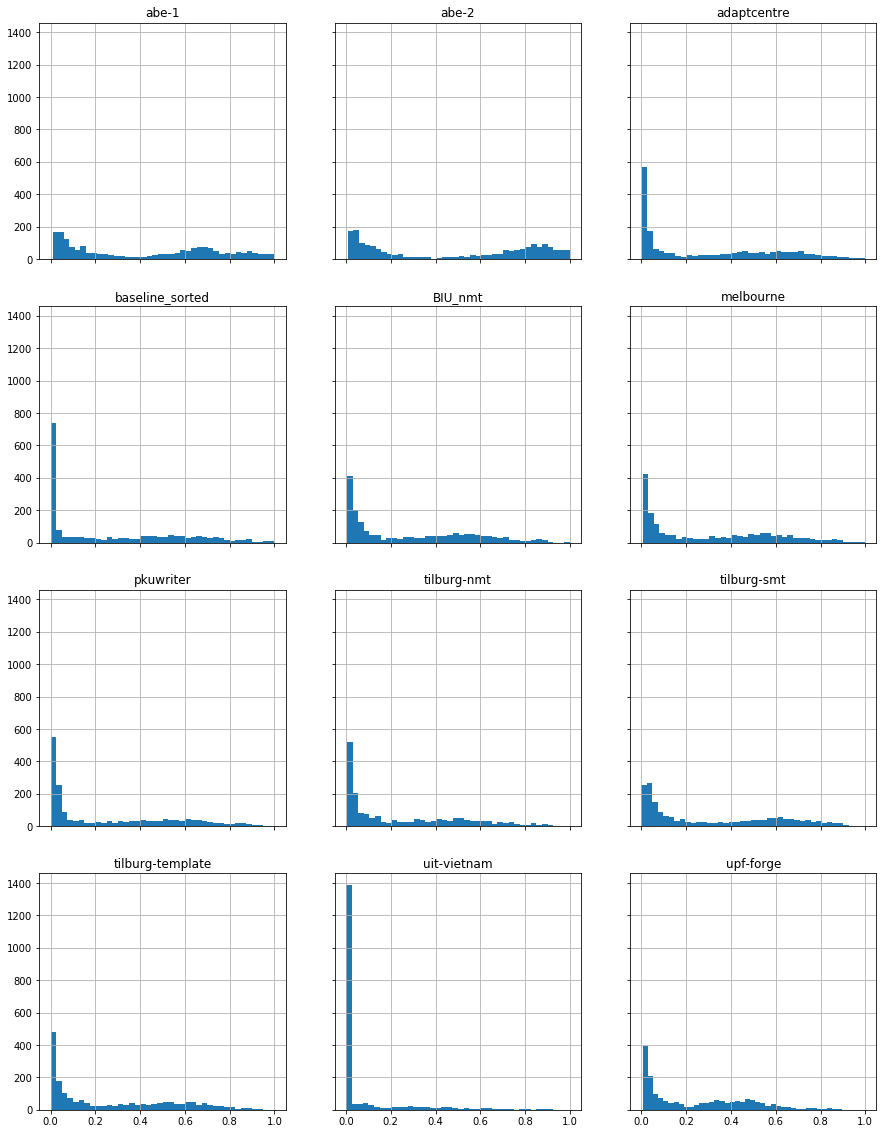

In [16]:
plot_all_models_hist_bleu('all-cat')